# Лабораторная работа 6: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет** в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

2)

In [6]:
import numpy as np
import qpsolvers
# Решение с помощью qpsolvers
P_np = np.array([[2., 0.], [0., 8.]])
q_np = np.array([-8., -16.])
G_np = np.array([[1., 1.], [1., 0.], [-1., 0.], [0., -1.]])
h_np = np.array([5., 3., 0., 0.])
    
z = qpsolvers.solve_qp(P_np, q_np, G_np, h_np, solver='cvxopt')
print("\nРешение через qpsolvers:")
print("z =", z)


Решение через qpsolvers:
z = [2.99999983 1.99869093]


In [9]:
import numpy as np
from cvxopt import matrix, solvers

# Коэффициенты целевой функции
# f(z) = -8z1 - 16z2 + z1^2 + 4z2^2
# В канонической форме: (1/2)z^T P z + q^T z
P = matrix([[2., 0.], [0., 8.]])  # P = 2*[[1,0],[0,4]]
q = matrix([-8., -16.])           # q = [-8, -16]

# Ограничения-неравенства Gz <= h
# 1) z1 + z2 <= 5
# 2) z1 <= 3 (эквивалентно: z1 <= 3)
# 3) z1 >= 0 (эквивалентно: -z1 <= 0)
# 4) z2 >= 0 (эквивалентно: -z2 <= 0)
G = matrix([[1., 1., -1., 0.], 
            [1., 0., 0., -1.]])
h = matrix([5., 3., 0., 0.])

# Решаем задачу
sol = solvers.qp(P, q, G, h)

# Выводим результаты
print("Статус решения:", sol['status'])
print("Оптимальная точка:")
print("z1 =", sol['x'][0])
print("z2 =", sol['x'][1])
print("Значение функции в оптимальной точке:", sol['primal objective'])

x1, x2 = sol['x'][0], sol['x'][1]
print(f"Точка оптимума: x1 = {x1:.10f}, x2 = {x2:.10f}")
print(f"Значение функции: {sol['primal objective']:.10f}")

print(f"\nТочная проверка ограничений:")
print(f"x1 + x2 = {x1 + x2:.10f} ≤ 5: {'АКТИВНО' if abs(x1 + x2 - 5) < 1e-8 else 'неактивно'}")
print(f"x1 = {x1:.10f} ≤ 3: {'АКТИВНО' if abs(x1 - 3) < 1e-8 else 'активно'}")
print(f"x1 = {x1:.10f} ≥ 0: {'АКТИВНО' if abs(x1) < 1e-8 else 'неактивно'}")
print(f"x2 = {x2:.10f} ≥ 0: {'АКТИВНО' if abs(x2) < 1e-8 else 'неактивно'}")
     

Статус решения: optimal
Оптимальная точка:
z1 = 2.9999998301061535
z2 = 1.9986909284531613
Значение функции в оптимальной точке: -30.99999280553902
Точка оптимума: x1 = 2.9999998301, x2 = 1.9986909285
Значение функции: -30.9999928055

Точная проверка ограничений:
x1 + x2 = 4.9986907586 ≤ 5: неактивно
x1 = 2.9999998301 ≤ 3: активно
x1 = 2.9999998301 ≥ 0: неактивно
x2 = 1.9986909285 ≥ 0: неактивно


3.

 Активные ограничения (влияют на точку оптимума):
x₁ ≤ 3

Неактивные ограничения (можно выбросить без изменения точки оптимума):
 - x₁ + x₂ ≤ 5
 - x₁ ≥ 0
 - x₂ ≥ 0

Обоснование:
В точке оптимума (3.0, 2.0):
 - x₁ ≤ 3 - активно (x₁ = 3, выполняется как равенство). Без этого ограничения оптимум сместился бы в точку (4, 2), где значение функции было бы лучше.
 - x₁ + x₂ ≤ 5 - неактивно (3 + 2 = 5, но численно x₁ + x₂ ≈ 4.99999 < 5). Даже если убрать это ограничение, точка (3, 2) останется допустимой.
 - x₁ ≥ 0 - неактивно (x₁ = 3 > 0, большой запас). Удаление этого ограничения не изменит точку оптимума.
 - x₂ ≥ 0 - неактивно (x₂ ≈ 2.0 > 0, большой запас). Удаление этого ограничения не изменит точку оптимума.

Таким образом, только ограничение x₁ ≤ 3 является существенным и определяет положение оптимума в данной задаче.

## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

ЭКСПЕРИМЕНТЫ С МЕТОДОМ ОПОРНЫХ ВЕКТОРОВ (SVM)
Линейный SVM на данных: linear
C=  0.01:  2 опорных векторов, b=-0.0614, сумма ξ=2.2882
C=  0.10:  0 опорных векторов, b=-0.0779, сумма ξ=0.0494


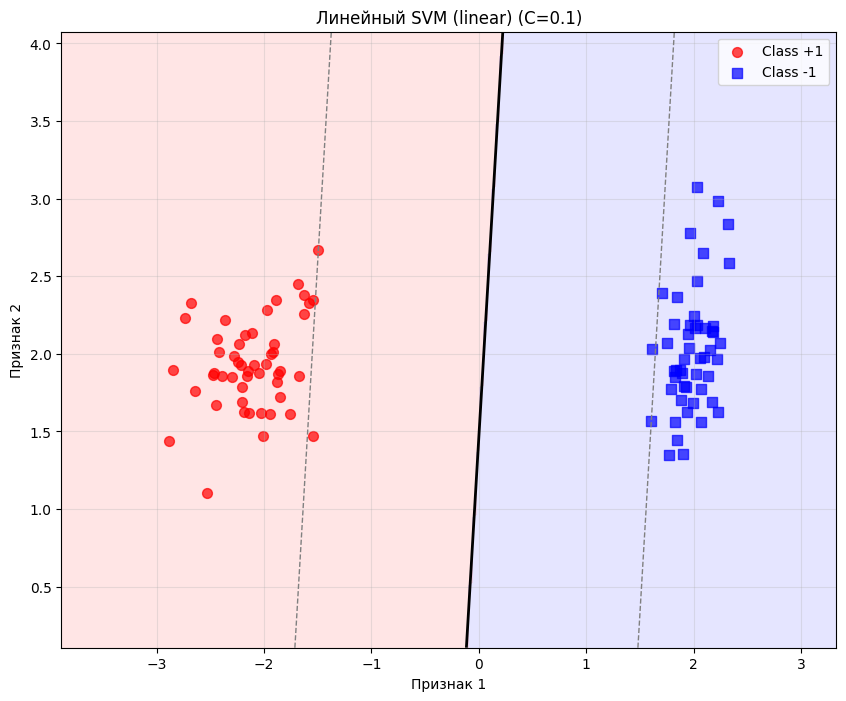

C=  1.00:  3 опорных векторов, b=-0.0269, сумма ξ=0.0000


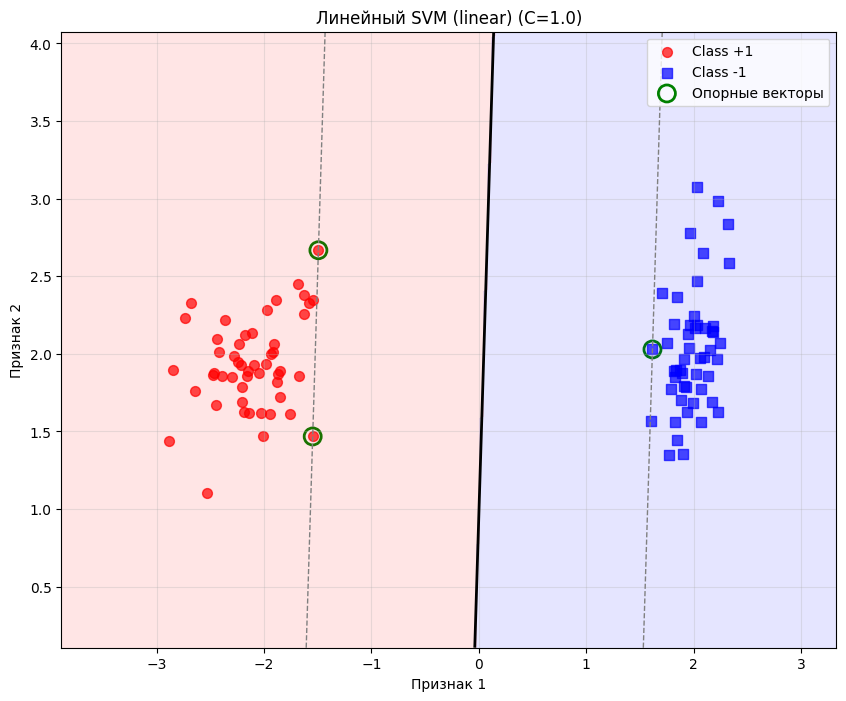

C= 10.00:  3 опорных векторов, b=-0.0269, сумма ξ=0.0000


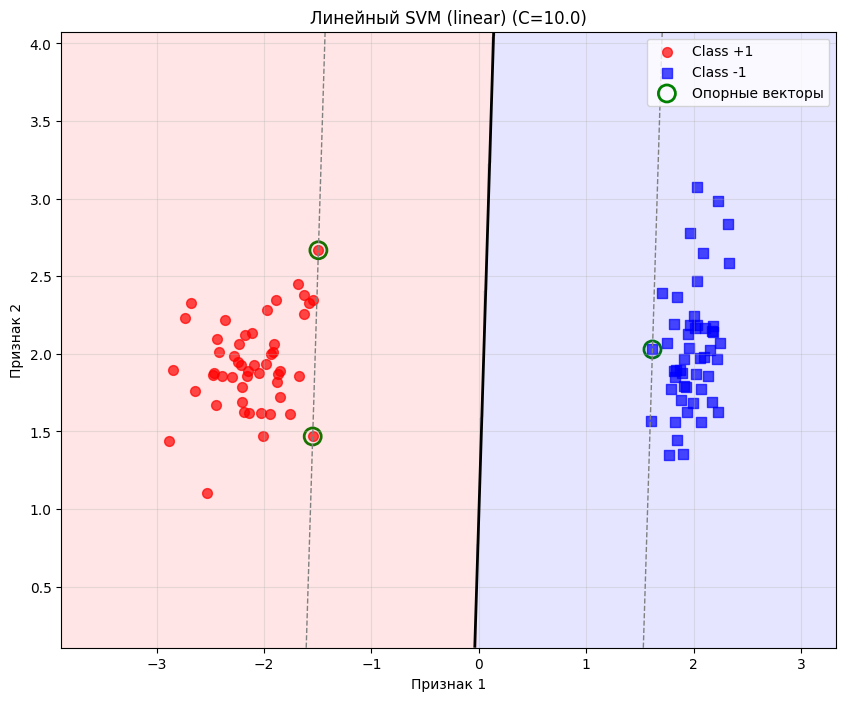

C=100.00:  3 опорных векторов, b=-0.0269, сумма ξ=0.0000


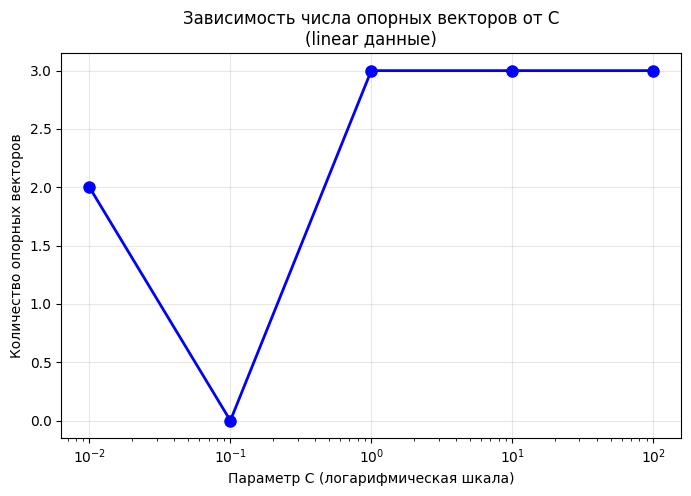

Линейный SVM на данных: circles
C=  0.01:  0 опорных векторов, b=-0.0000, сумма ξ=99.9999
C=  0.10:  0 опорных векторов, b=0.0000, сумма ξ=99.9987


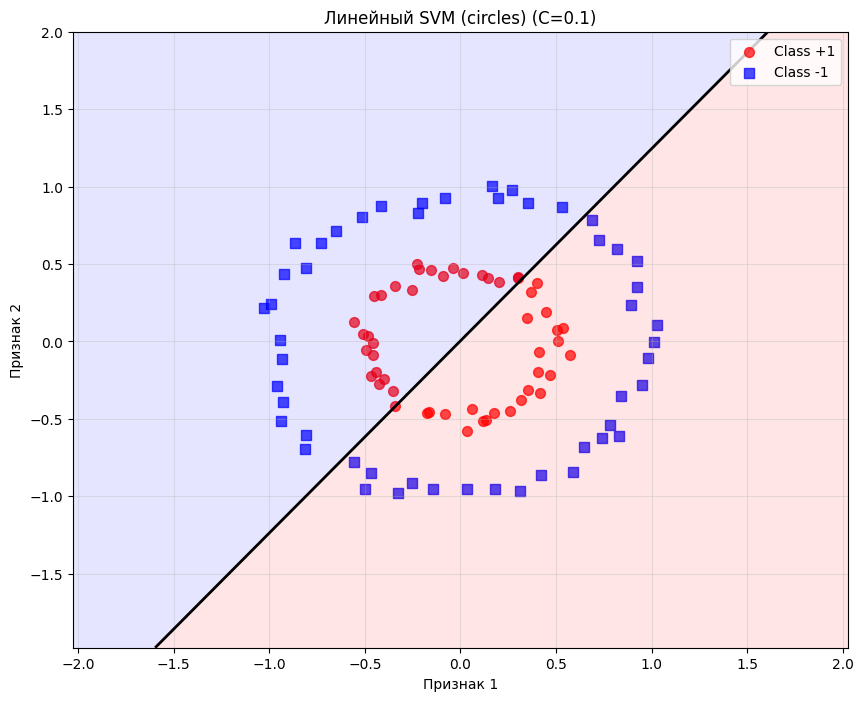

C=  1.00:  0 опорных векторов, b=0.0047, сумма ξ=99.9873


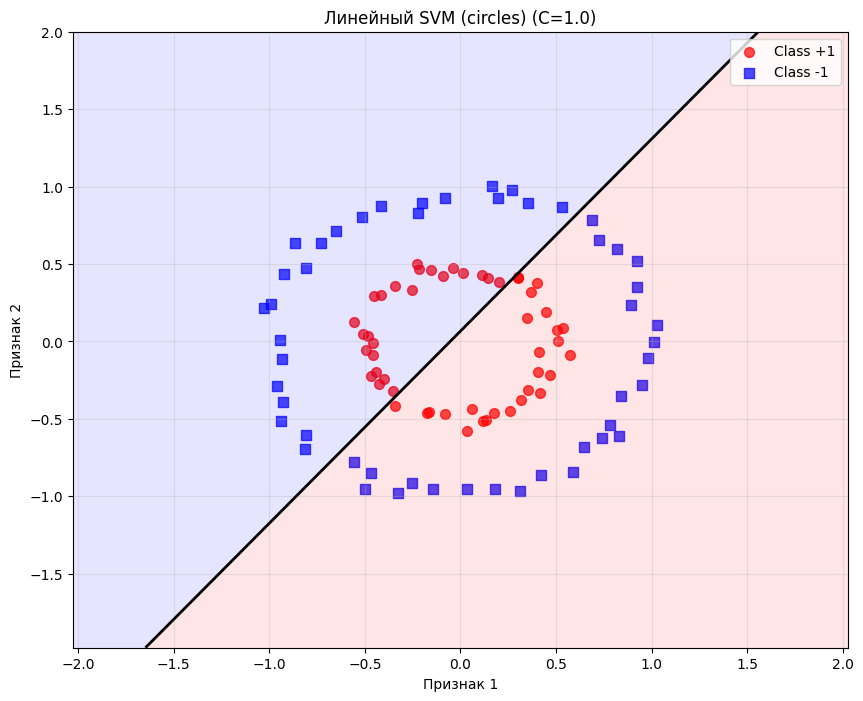

C= 10.00:  0 опорных векторов, b=0.2677, сумма ξ=99.8729


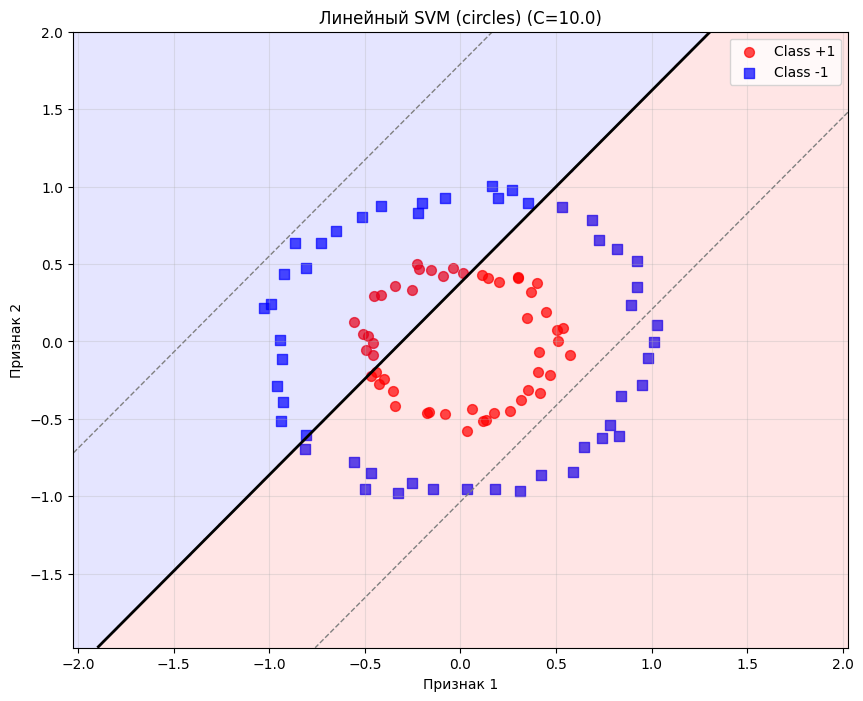

C=100.00:  2 опорных векторов, b=0.3302, сумма ξ=99.8586


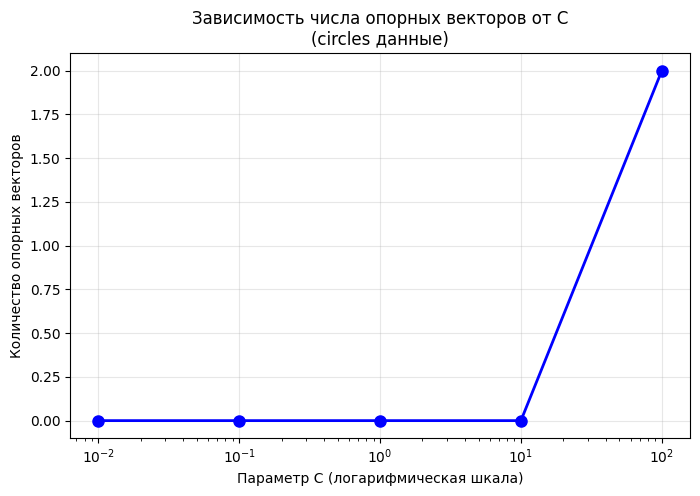

Линейный SVM на данных: moons
C=  0.01:  0 опорных векторов, b=-0.0821, сумма ξ=62.6518
C=  0.10:  3 опорных векторов, b=-0.0484, сумма ξ=40.3843


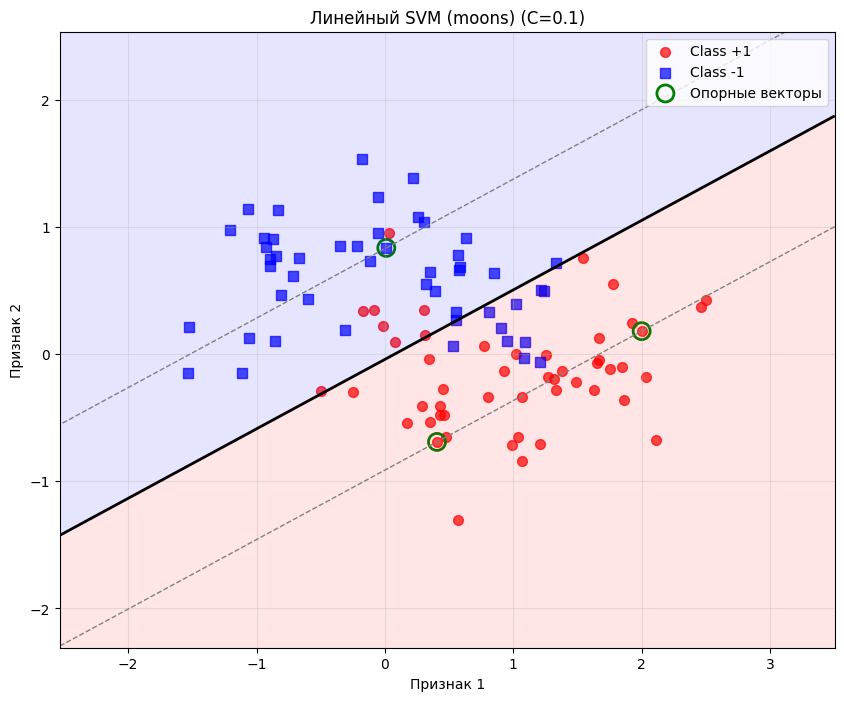

C=  1.00:  3 опорных векторов, b=-0.0890, сумма ξ=33.9096


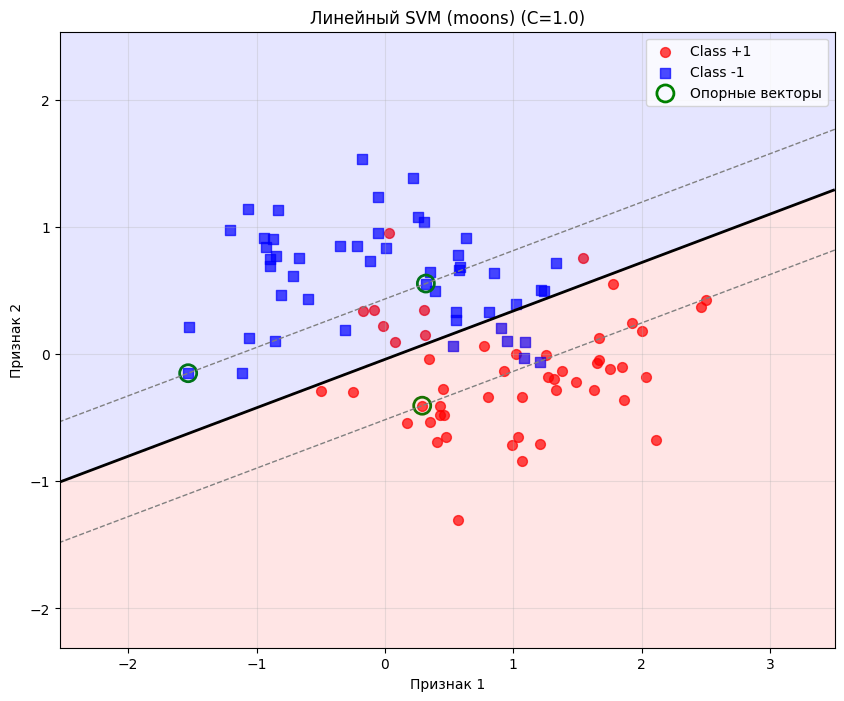

C= 10.00:  3 опорных векторов, b=-0.0783, сумма ξ=33.4045


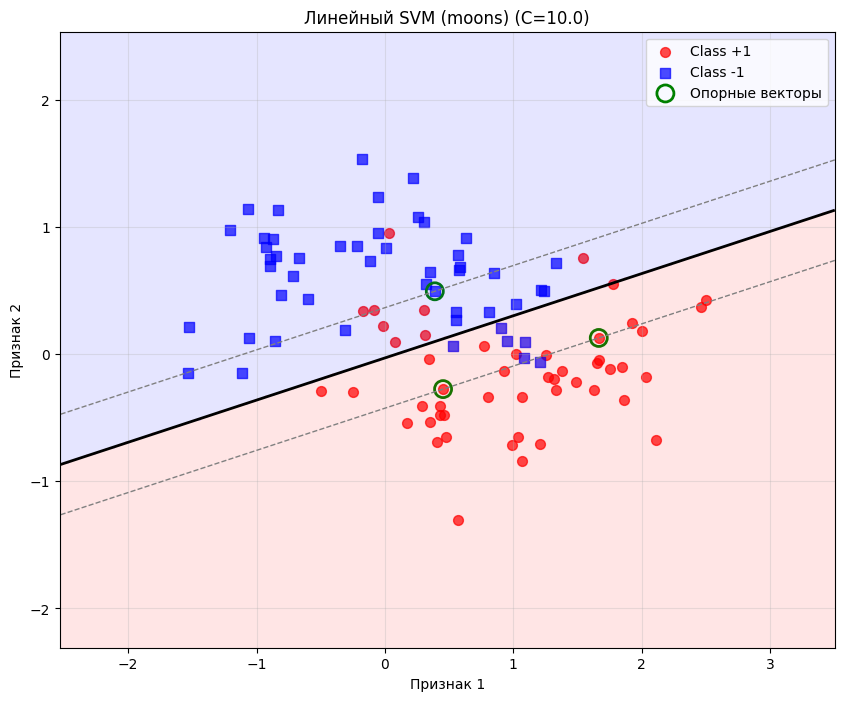

C=100.00:  3 опорных векторов, b=-0.0880, сумма ξ=33.3991


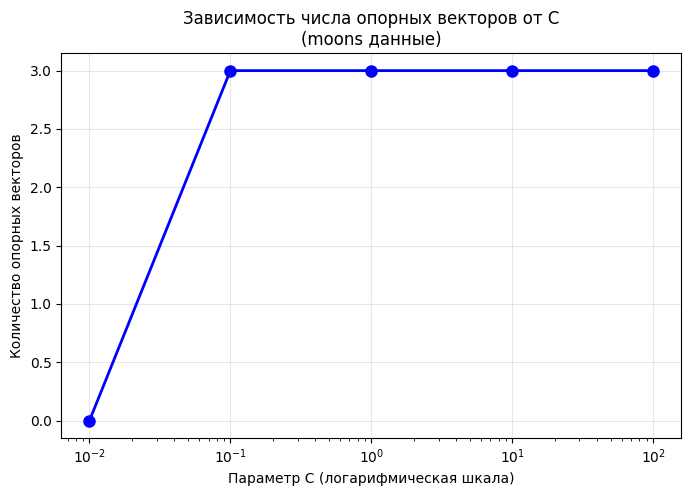

Квадратичный SVM на данных: linear
C=1.0: 3 опорных векторов
Веса: w1=-0.1945, w2=-0.0019, w11=-0.0221, w12=-0.2880, w22=-0.0063
Смещение: b=0.1146


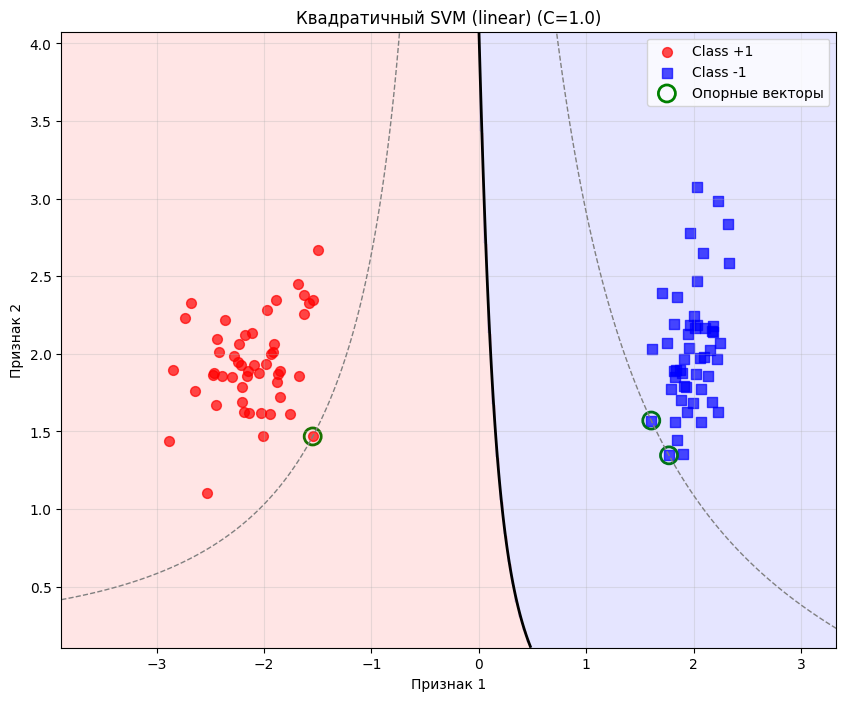

Квадратичный SVM на данных: circles
C=1.0: 6 опорных векторов
Веса: w1=0.0664, w2=-0.0162, w11=-3.1175, w12=0.1885, w22=-3.2261
Смещение: b=1.8740


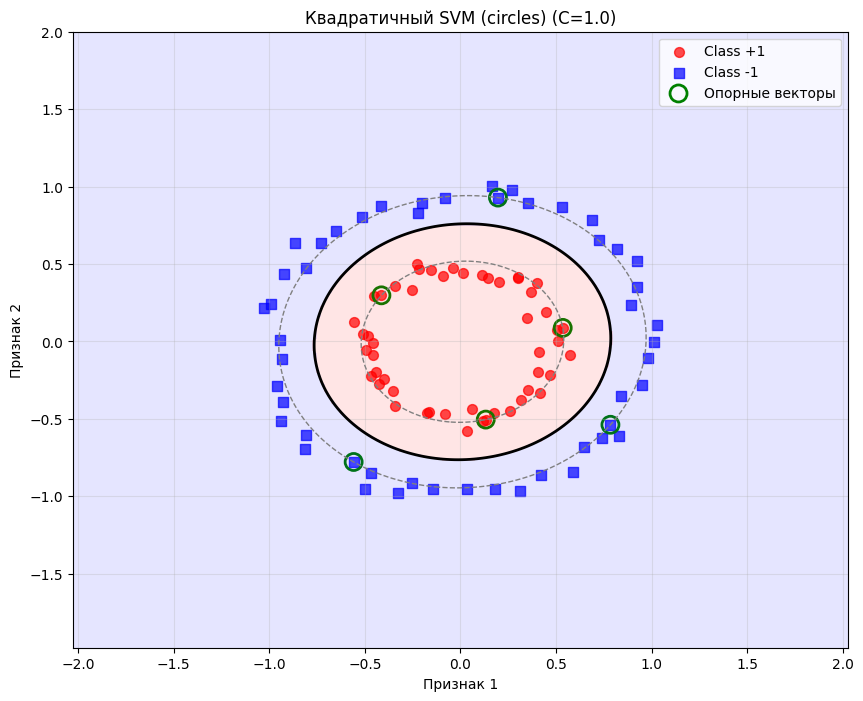

Квадратичный SVM на данных: moons
C=1.0: 5 опорных векторов
Веса: w1=0.7764, w2=-1.8473, w11=0.1531, w12=-0.9236, w22=0.5563
Смещение: b=-0.2477


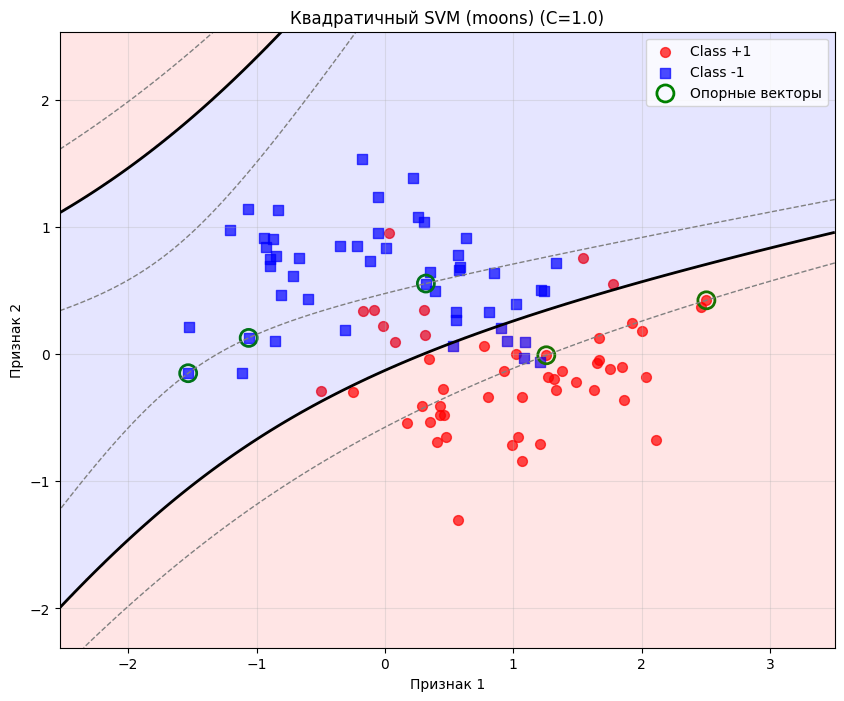

Сравнение линейного и квадратичного SVM

Точность линейного SVM: 66.67%
Точность квадратичного SVM: 100.00%

Количество опорных векторов:
  Линейный SVM: 2
  Квадратичный SVM: 6


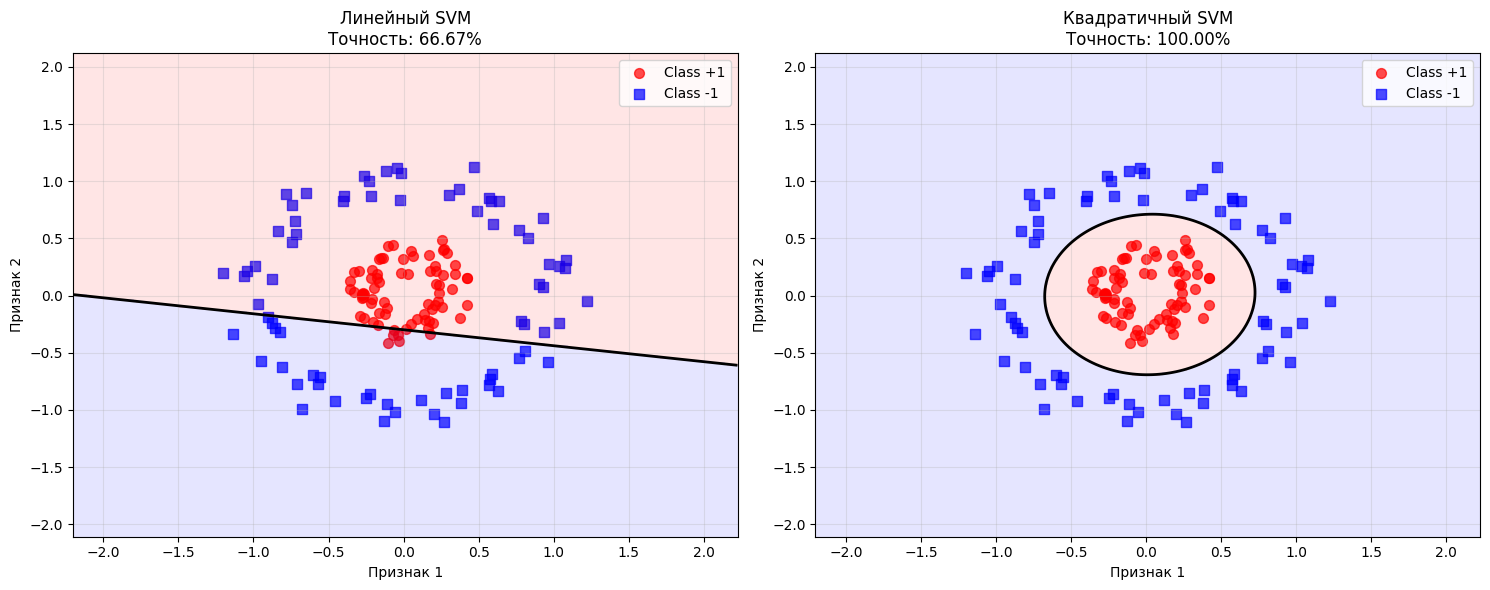

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification, make_circles, make_moons
from matplotlib.colors import ListedColormap

# Отключаем вывод CVXOPT
solvers.options['show_progress'] = False

# 1. Функция обучения линейного SVM через QP
def train_linear_svm(X, y, C=1.0):
    """
    Обучение линейного SVM через решение QP задачи
    
    Параметры:
    X - матрица признаков (N x d)
    y - вектор меток классов (+1 или -1)
    C - гиперпараметр регуляризации
    
    Возвращает:
    w - веса
    b - смещение
    support_vectors - опорные векторы
    """
    N, d = X.shape
    
    # 1. Строим матрицу P для квадратичной части
    # Размерность: (d+1+N) x (d+1+N)
    # Первые d+1 переменные: w и b, остальные N: ξ_i
    P = np.zeros((d+1+N, d+1+N))
    
    # Квадратичная часть только для w (не для b и не для ξ)
    P[:d, :d] = np.eye(d)  # для w
    
    # 2. Вектор q (линейная часть)
    q = np.zeros(d+1+N)
    q[d+1:] = C  # для переменных ξ
    
    # 3. Матрица ограничений G
    # Ограничения: y_i(w·x_i + b) >= 1 - ξ_i  =>  -y_i(w·x_i + b) - ξ_i <= -1
    # и ξ_i >= 0 => -ξ_i <= 0
    
    # Первые N ограничений
    G1 = np.zeros((N, d+1+N))
    for i in range(N):
        G1[i, :d] = -y[i] * X[i]  # для w
        G1[i, d] = -y[i]          # для b
        G1[i, d+1+i] = -1         # для ξ_i
    
    # Следующие N ограничений (ξ_i >= 0)
    G2 = np.zeros((N, d+1+N))
    G2[:, d+1:] = -np.eye(N)  # -ξ_i <= 0
    
    G = np.vstack([G1, G2])
    
    # 4. Вектор h
    h = np.zeros(2*N)
    h[:N] = -1  # первые N ограничений: <= -1
    
    # 5. Решаем QP задачу
    P_mat = matrix(P, tc='d')
    q_mat = matrix(q, tc='d')
    G_mat = matrix(G, tc='d')
    h_mat = matrix(h, tc='d')
    
    solution = solvers.qp(P_mat, q_mat, G_mat, h_mat)
    
    # 6. Извлекаем решение
    params = np.array(solution['x']).flatten()
    w = params[:d]
    b = params[d]
    xi = params[d+1:]
    
    # 7. Находим опорные векторы (те, для которых ограничение активно)
    margins = y * (X.dot(w) + b)
    support_indices = np.where((margins <= 1 + 1e-5) & (margins >= 1 - 1e-5))[0]
    support_vectors = X[support_indices]
    
    return w, b, support_vectors, xi, support_indices

# 2. Функция для квадратичного преобразования признаков
def quadratic_features(X):
    """
    Преобразование признаков: [x1, x2] -> [x1, x2, x1^2, x1*x2, x2^2]
    """
    N = X.shape[0]
    X_quad = np.zeros((N, 5))
    X_quad[:, 0] = X[:, 0]  # x1
    X_quad[:, 1] = X[:, 1]  # x2
    X_quad[:, 2] = X[:, 0]**2  # x1^2
    X_quad[:, 3] = X[:, 0] * X[:, 1]  # x1*x2
    X_quad[:, 4] = X[:, 1]**2  # x2^2
    return X_quad

# 3. Функция для визуализации линейного SVM
def plot_linear_svm(X, y, w, b, support_vectors=None, title="Линейный SVM", C=1.0):
    """
    Визуализация линейного SVM
    """
    plt.figure(figsize=(10, 8))
    
    # Разделяющая прямая
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Сетка для построения границ
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Значения функции на сетке
    Z = xx * w[0] + yy * w[1] + b
    
    # Классы
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                marker='o', label='Class +1', s=50, alpha=0.7)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                marker='s', label='Class -1', s=50, alpha=0.7)
    
    # Опорные векторы
    if support_vectors is not None and len(support_vectors) > 0:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                   s=150, facecolors='none', edgecolors='green',
                   linewidths=2, label='Опорные векторы')
    
    # Разделяющая поверхность
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    # Границы коридора
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='gray', 
                linewidths=1, linestyles='dashed')
    
    # Области
    plt.contourf(xx, yy, np.sign(Z), alpha=0.1, 
                 colors=['blue', 'red'], levels=[-2, 0, 2])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f'{title} (C={C})')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()

# 4. Функция для визуализации квадратичного SVM
def plot_quadratic_svm(X, y, w, b, support_vectors=None, title="Квадратичный SVM", C=1.0):
    """
    Визуализация квадратичного SVM
    """
    plt.figure(figsize=(10, 8))
    
    # Границы графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Сетка для построения границ
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Значения функции на сетке (квадратичная форма)
    Z = (xx * w[0] + yy * w[1] + 
         xx**2 * w[2] + xx * yy * w[3] + yy**2 * w[4] + b)
    
    # Классы
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                marker='o', label='Class +1', s=50, alpha=0.7)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                marker='s', label='Class -1', s=50, alpha=0.7)
    
    # Опорные векторы
    if support_vectors is not None and len(support_vectors) > 0:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                   s=150, facecolors='none', edgecolors='green',
                   linewidths=2, label='Опорные векторы')
    
    # Разделяющая поверхность
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    # Границы коридора
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='gray', 
                linewidths=1, linestyles='dashed')
    
    # Области
    plt.contourf(xx, yy, np.sign(Z), alpha=0.1, 
                 colors=['blue', 'red'], levels=[-2, 0, 2])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f'{title} (C={C})')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()

# 5. Генерация данных
def generate_datasets():
    """
    Генерация трех типов выборок
    """
    np.random.seed(42)
    
    # 1. Линейно разделимые данные
    X_linear, y_linear = make_classification(
        n_samples=100, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=1
    )
    y_linear = 2 * y_linear - 1
    
    # 2. Нелинейно разделимые (два круга)
    X_circles, y_circles = make_circles(
        n_samples=100, noise=0.05, factor=0.5, random_state=1
    )
    y_circles = 2 * y_circles - 1
    
    # 3. Плохо разделимые (полумесяцы)
    X_moons, y_moons = make_moons(
        n_samples=100, noise=0.3, random_state=1
    )
    y_moons = 2 * y_moons - 1
    
    return {
        'linear': (X_linear, y_linear),
        'circles': (X_circles, y_circles),
        'moons': (X_moons, y_moons)
    }

# 6. Эксперимент 1: Линейный SVM на разных данных
def experiment_linear_svm():
    """Эксперимент с линейным SVM на разных типах данных"""
    datasets = generate_datasets()
    C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
    
    for data_name, (X, y) in datasets.items():
        print(f"Линейный SVM на данных: {data_name}")
        
        n_support_vectors_list = []
        
        for C in C_values:
            w, b, support_vectors, xi, support_indices = train_linear_svm(X, y, C)
            n_sv = len(support_vectors)
            n_support_vectors_list.append(n_sv)
            
            print(f"C={C:6.2f}: {n_sv:2d} опорных векторов, "
                  f"b={b:.4f}, сумма ξ={xi.sum():.4f}")
            
            # Визуализация для некоторых значений C
            if C in [0.1, 1.0, 10.0]:
                plot_linear_svm(X, y, w, b, support_vectors, 
                               f"Линейный SVM ({data_name})", C)
        
        # График зависимости числа опорных векторов от C
        plt.figure(figsize=(8, 5))
        plt.plot(C_values, n_support_vectors_list, 'bo-', linewidth=2, markersize=8)
        plt.xscale('log')
        plt.xlabel('Параметр C (логарифмическая шкала)')
        plt.ylabel('Количество опорных векторов')
        plt.title(f'Зависимость числа опорных векторов от C\n({data_name} данные)')
        plt.grid(True, alpha=0.3)
        plt.show()

# 7. Эксперимент 2: Квадратичный SVM
def experiment_quadratic_svm():
    """Эксперимент с квадратичным SVM"""
    datasets = generate_datasets()
    C = 1.0
    
    for data_name, (X, y) in datasets.items():
        print(f"Квадратичный SVM на данных: {data_name}")
        
        # Преобразование признаков
        X_quad = quadratic_features(X)
        
        # Обучение квадратичного SVM
        w, b, support_vectors_quad, xi, support_indices = train_linear_svm(X_quad, y, C)
        
        print(f"C={C}: {len(support_vectors_quad)} опорных векторов")
        print(f"Веса: w1={w[0]:.4f}, w2={w[1]:.4f}, "
              f"w11={w[2]:.4f}, w12={w[3]:.4f}, w22={w[4]:.4f}")
        print(f"Смещение: b={b:.4f}")
        
        # Для визуализации находим опорные векторы в исходном пространстве
        support_vectors_orig = X[support_indices]
        
        # Визуализация
        plot_quadratic_svm(X, y, w, b, support_vectors_orig, 
                          f"Квадратичный SVM ({data_name})", C)

# 8. Сравнение линейного и квадратичного SVM
def compare_svm_methods():
    """Сравнение линейного и квадратичного SVM"""
    # Генерируем сложные нелинейные данные
    X, y = make_circles(n_samples=150, noise=0.1, factor=0.3, random_state=42)
    y = 2 * y - 1
    
    C = 1.0
    
    print("Сравнение линейного и квадратичного SVM")
    
    # Линейный SVM
    w_linear, b_linear, sv_linear, xi_linear, _ = train_linear_svm(X, y, C)
    
    # Квадратичный SVM
    X_quad = quadratic_features(X)
    w_quad, b_quad, sv_quad, xi_quad, _ = train_linear_svm(X_quad, y, C)
    
    # Расчет точности
    def accuracy(X, w, b, y):
        predictions = np.sign(X.dot(w) + b)
        return np.mean(predictions == y)
    
    acc_linear = accuracy(X, w_linear, b_linear, y)
    acc_quad = accuracy(X_quad, w_quad, b_quad, y)
    
    print(f"\nТочность линейного SVM: {acc_linear:.2%}")
    print(f"Точность квадратичного SVM: {acc_quad:.2%}")
    print(f"\nКоличество опорных векторов:")
    print(f"  Линейный SVM: {len(sv_linear)}")
    print(f"  Квадратичный SVM: {len(sv_quad)}")
    
    # Визуализация сравнения
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Линейный SVM
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Левая панель: линейный SVM
    Z_linear = xx * w_linear[0] + yy * w_linear[1] + b_linear
    
    axes[0].scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                   marker='o', label='Class +1', s=50, alpha=0.7)
    axes[0].scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                   marker='s', label='Class -1', s=50, alpha=0.7)
    axes[0].contour(xx, yy, Z_linear, levels=[0], colors='black', linewidths=2)
    axes[0].contourf(xx, yy, np.sign(Z_linear), alpha=0.1, 
                    colors=['blue', 'red'], levels=[-2, 0, 2])
    axes[0].set_title(f'Линейный SVM\nТочность: {acc_linear:.2%}')
    axes[0].set_xlabel('Признак 1')
    axes[0].set_ylabel('Признак 2')
    axes[0].legend(loc='best')
    axes[0].grid(True, alpha=0.3)
    
    # Правая панель: квадратичный SVM
    Z_quad = (xx * w_quad[0] + yy * w_quad[1] + 
              xx**2 * w_quad[2] + xx * yy * w_quad[3] + yy**2 * w_quad[4] + b_quad)
    
    axes[1].scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                   marker='o', label='Class +1', s=50, alpha=0.7)
    axes[1].scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                   marker='s', label='Class -1', s=50, alpha=0.7)
    axes[1].contour(xx, yy, Z_quad, levels=[0], colors='black', linewidths=2)
    axes[1].contourf(xx, yy, np.sign(Z_quad), alpha=0.1, 
                    colors=['blue', 'red'], levels=[-2, 0, 2])
    axes[1].set_title(f'Квадратичный SVM\nТочность: {acc_quad:.2%}')
    axes[1].set_xlabel('Признак 1')
    axes[1].set_ylabel('Признак 2')
    axes[1].legend(loc='best')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Главная функция
def main():
    """Основная функция для запуска всех экспериментов"""
    print("ЭКСПЕРИМЕНТЫ С МЕТОДОМ ОПОРНЫХ ВЕКТОРОВ (SVM)")
    
    # Запускаем эксперименты
    experiment_linear_svm()
    experiment_quadratic_svm()
    compare_svm_methods()
# Запуск программы
if __name__ == "__main__":
    main()

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

ЭКСПЕРИМЕНТЫ С ЯДРОВЫМ SVM

1. ТЕСТИРОВАНИЕ РАЗНЫХ ЯДЕРНЫХ ФУНКЦИЙ
Данные: Линейно разделимые

Линейное ядро:
  Точность: 50.00%
  Опорных векторов: 4


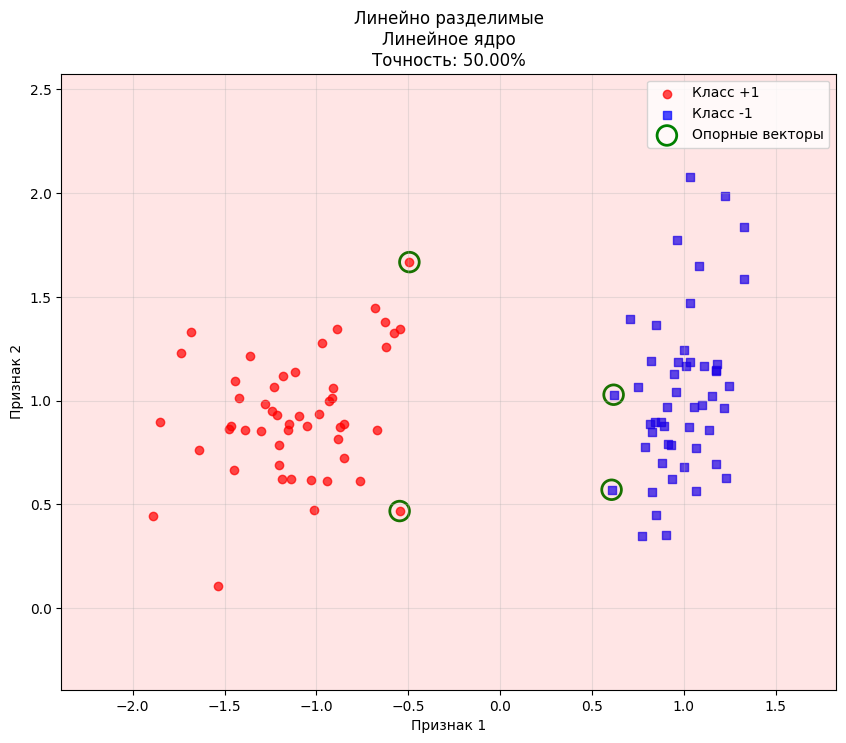


Полиномиальное ядро (степень 2):
  Точность: 50.00%
  Опорных векторов: 2


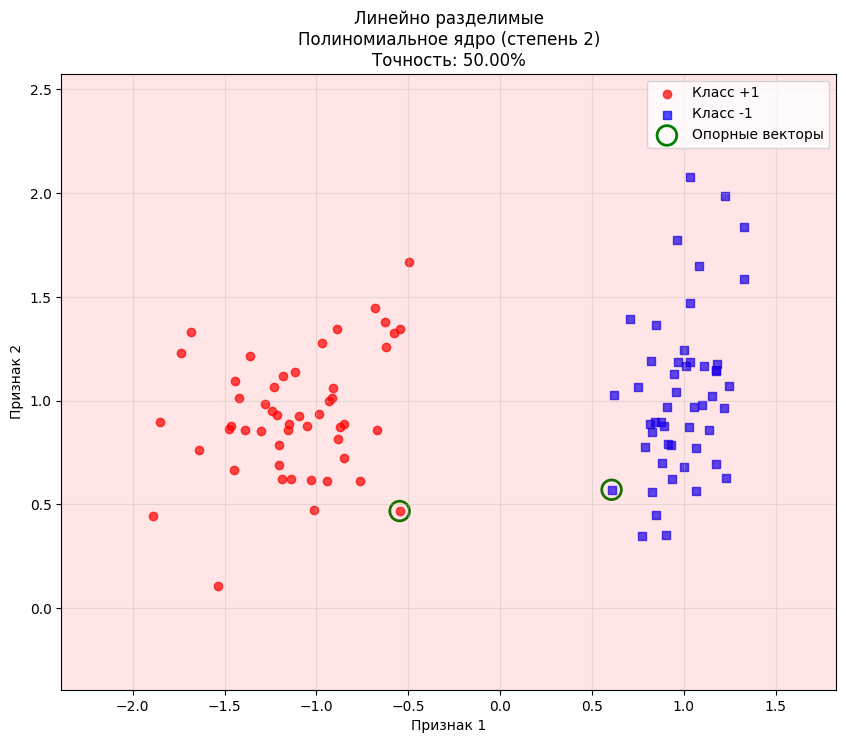


Полиномиальное ядро (степень 3):
  Точность: 50.00%
  Опорных векторов: 2


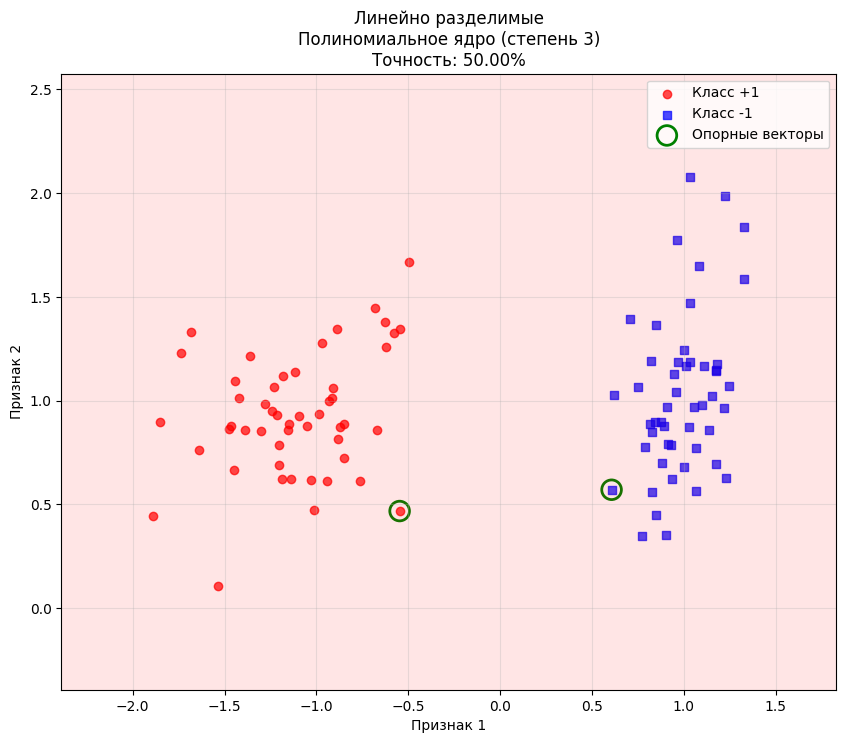


RBF ядро (gamma=1.0):
  Точность: 96.00%
  Опорных векторов: 12

RBF ядро (gamma=2.0):
  Точность: 91.00%
  Опорных векторов: 18
Данные: Два круга

Линейное ядро:
  Точность: 52.00%
  Опорных векторов: 100


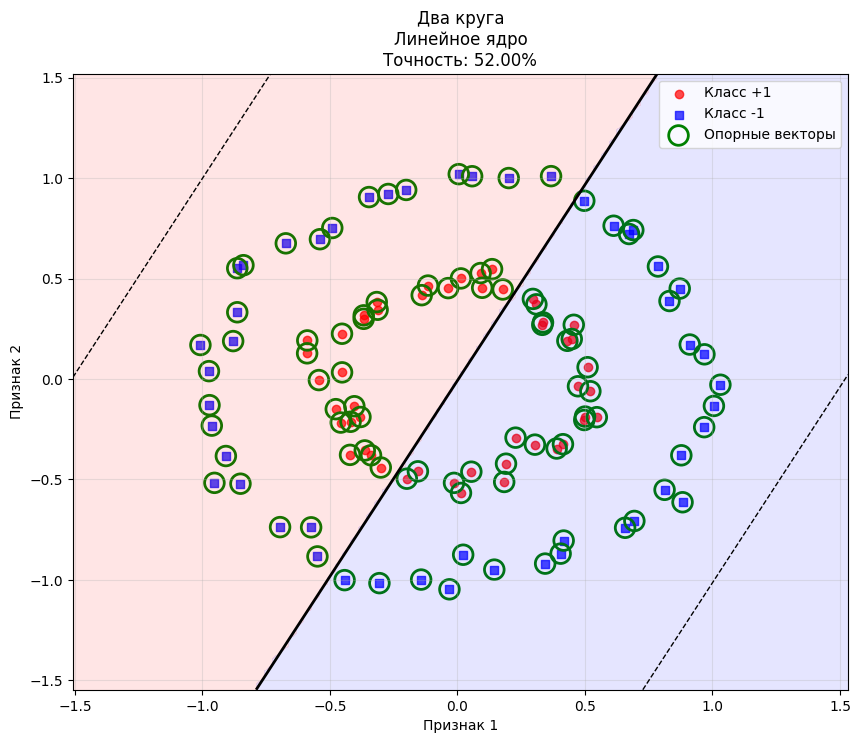


Полиномиальное ядро (степень 2):
  Точность: 50.00%
  Опорных векторов: 28


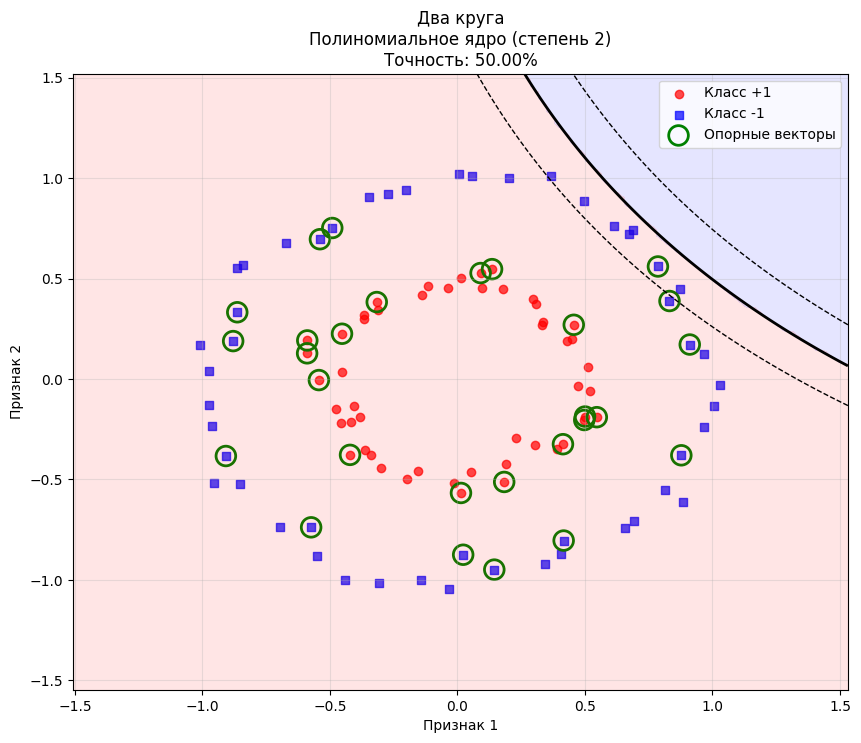


Полиномиальное ядро (степень 3):
  Точность: 55.00%
  Опорных векторов: 14


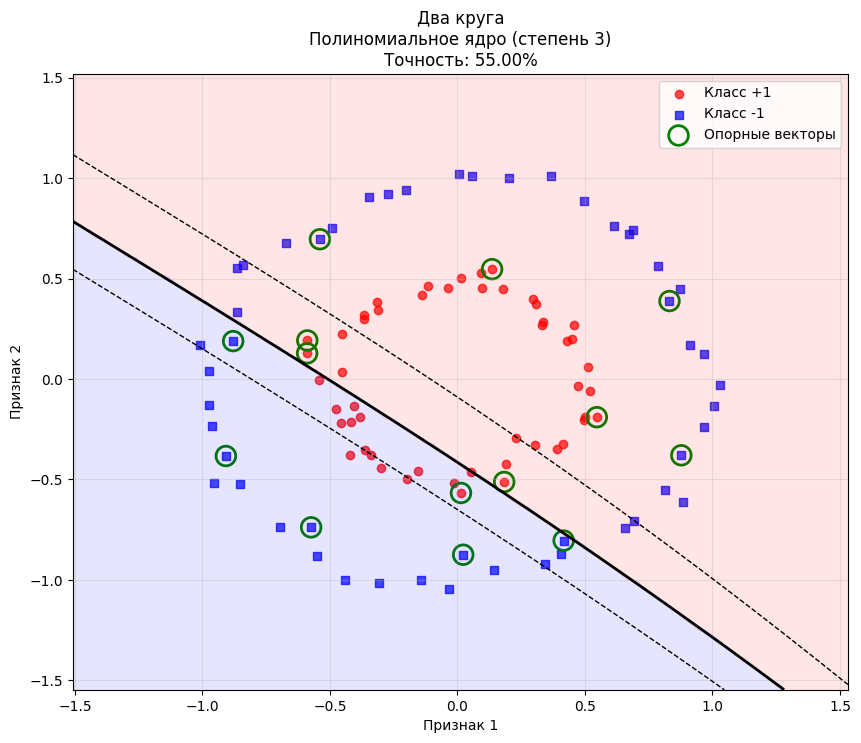


RBF ядро (gamma=1.0):
  Точность: 50.00%
  Опорных векторов: 32

RBF ядро (gamma=2.0):
  Точность: 60.00%
  Опорных векторов: 27
Данные: Два полумесяца

Линейное ядро:
  Точность: 69.00%
  Опорных векторов: 38


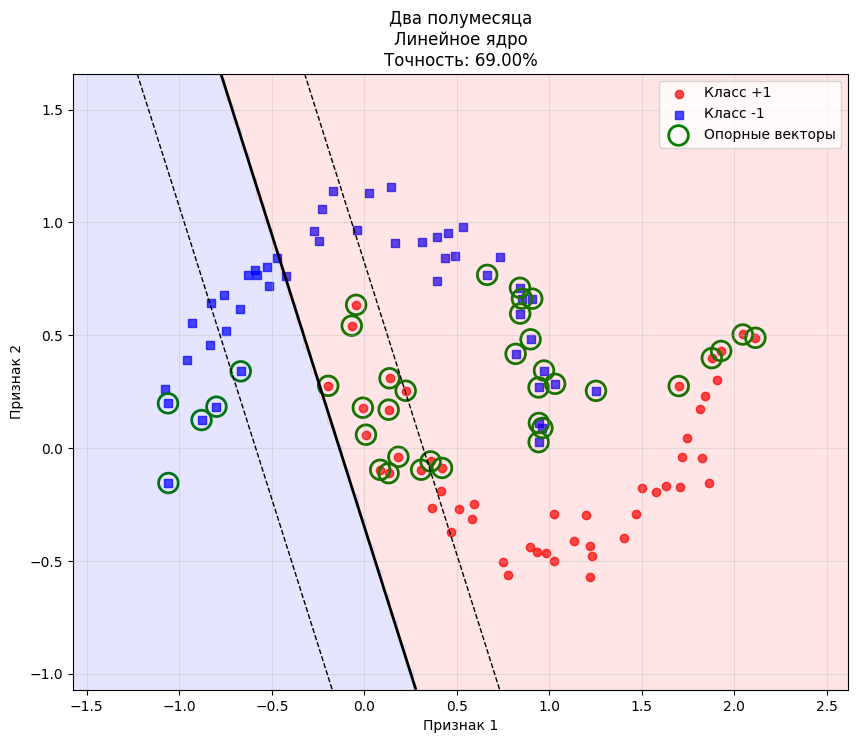


Полиномиальное ядро (степень 2):
  Точность: 78.00%
  Опорных векторов: 35


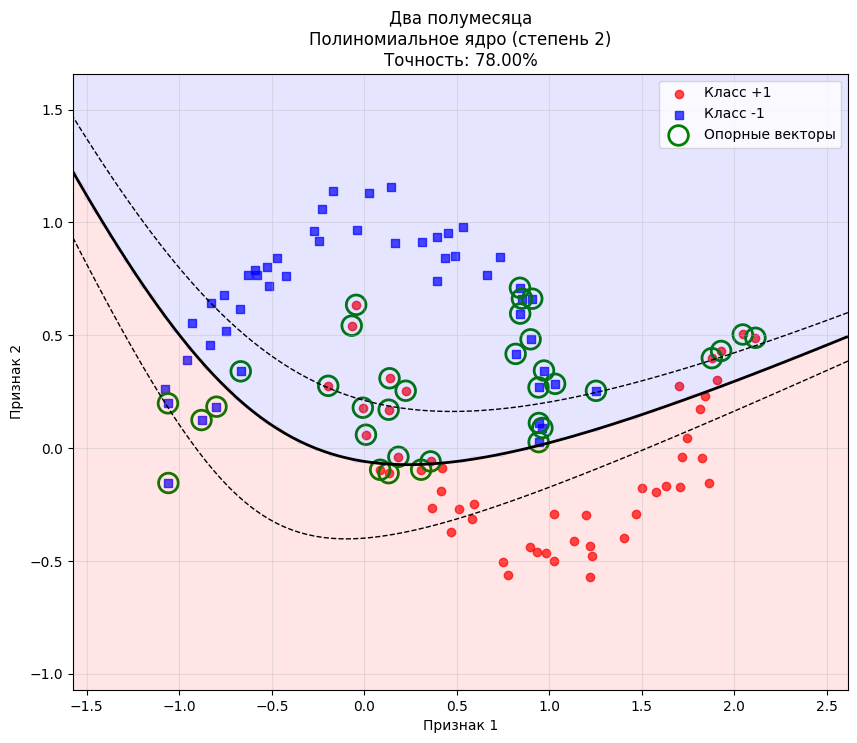


Полиномиальное ядро (степень 3):
  Точность: 51.00%
  Опорных векторов: 19


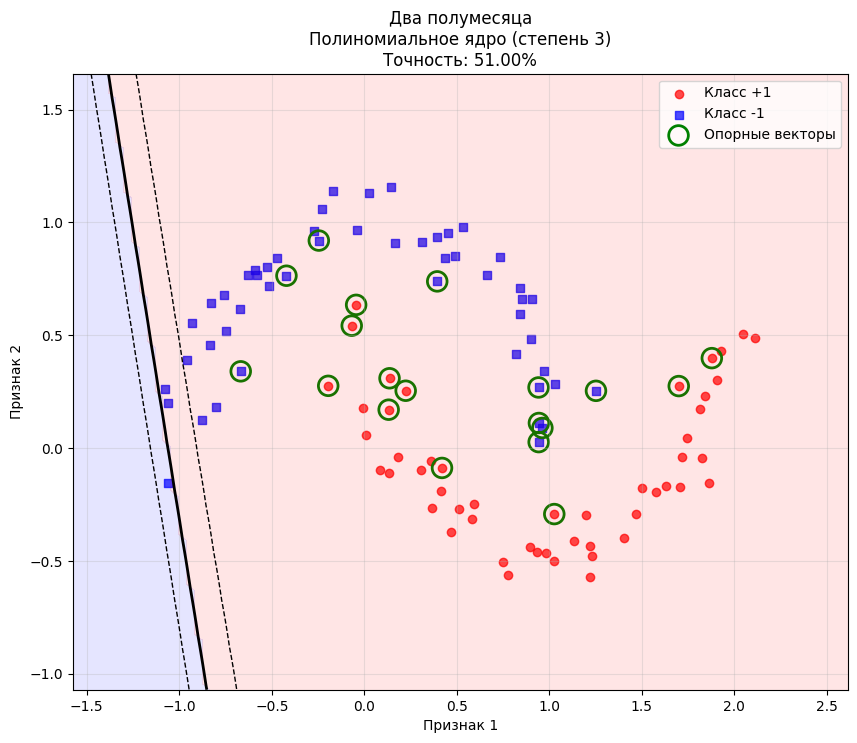


RBF ядро (gamma=1.0):
  Точность: 85.00%
  Опорных векторов: 31

RBF ядро (gamma=2.0):
  Точность: 51.00%
  Опорных векторов: 26


2. ИССЛЕДОВАНИЕ ПОЛИНОМИАЛЬНОГО ЯДРА


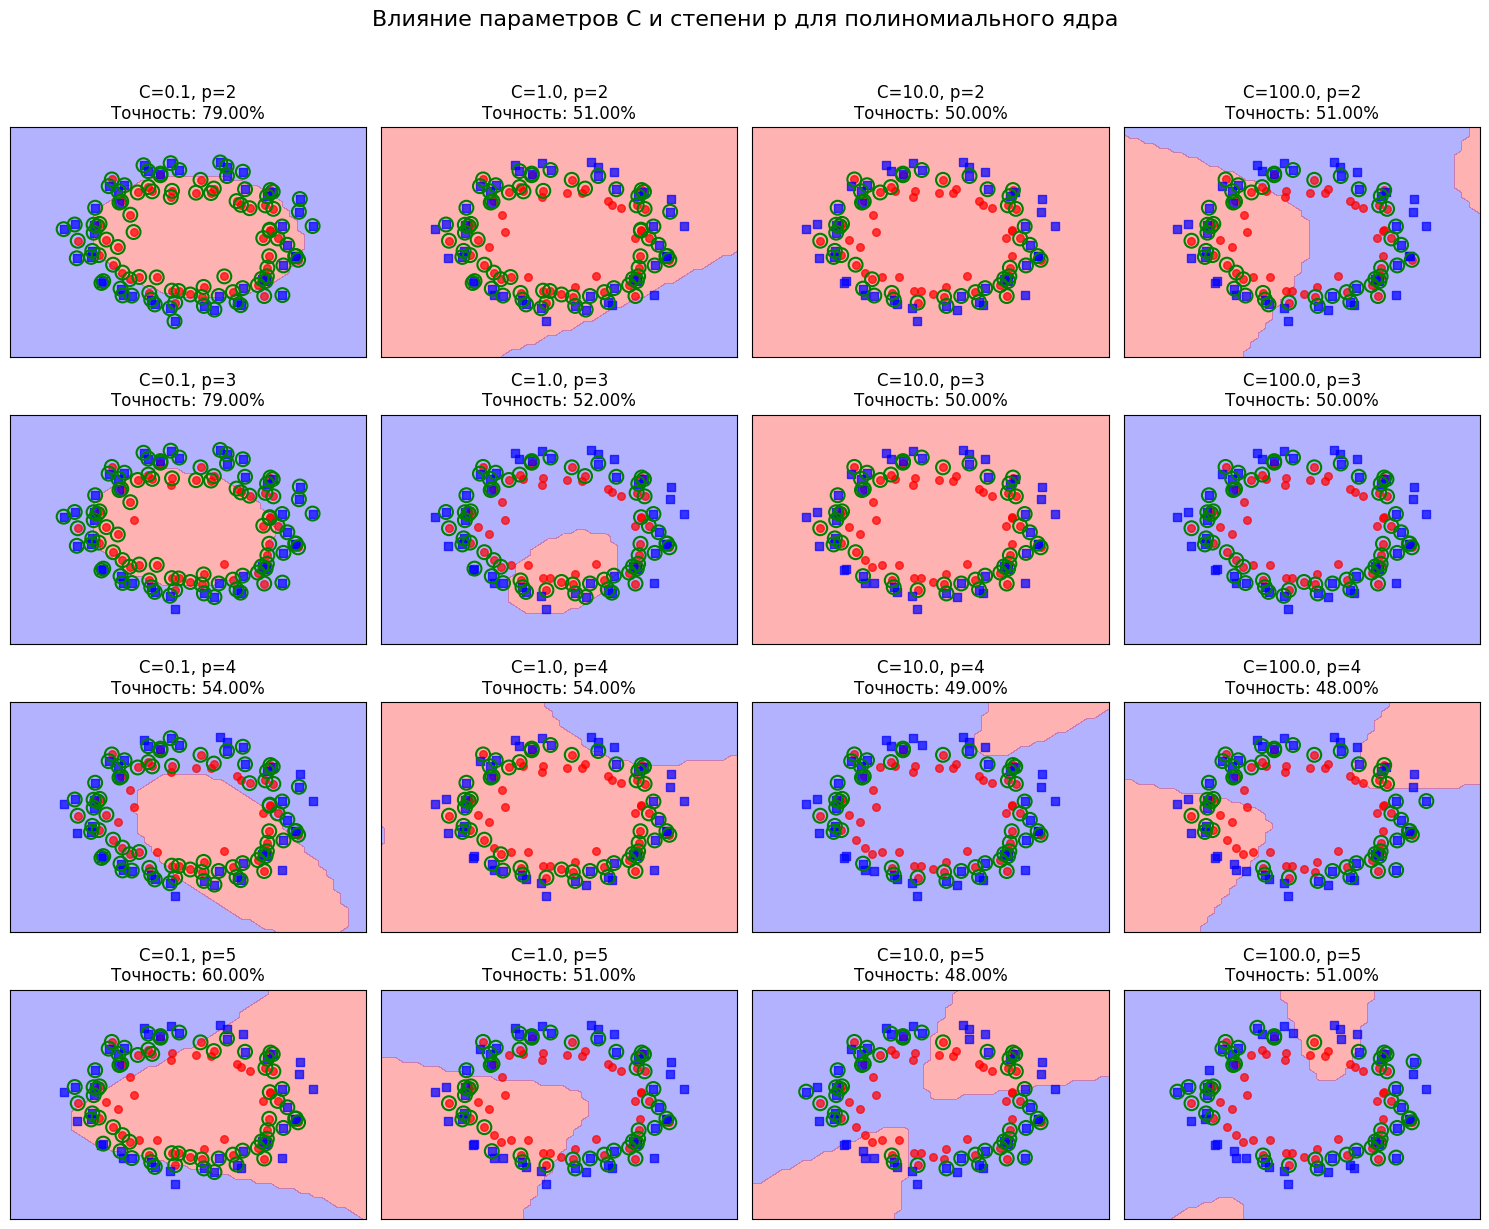



3. ИССЛЕДОВАНИЕ RBF ЯДРА


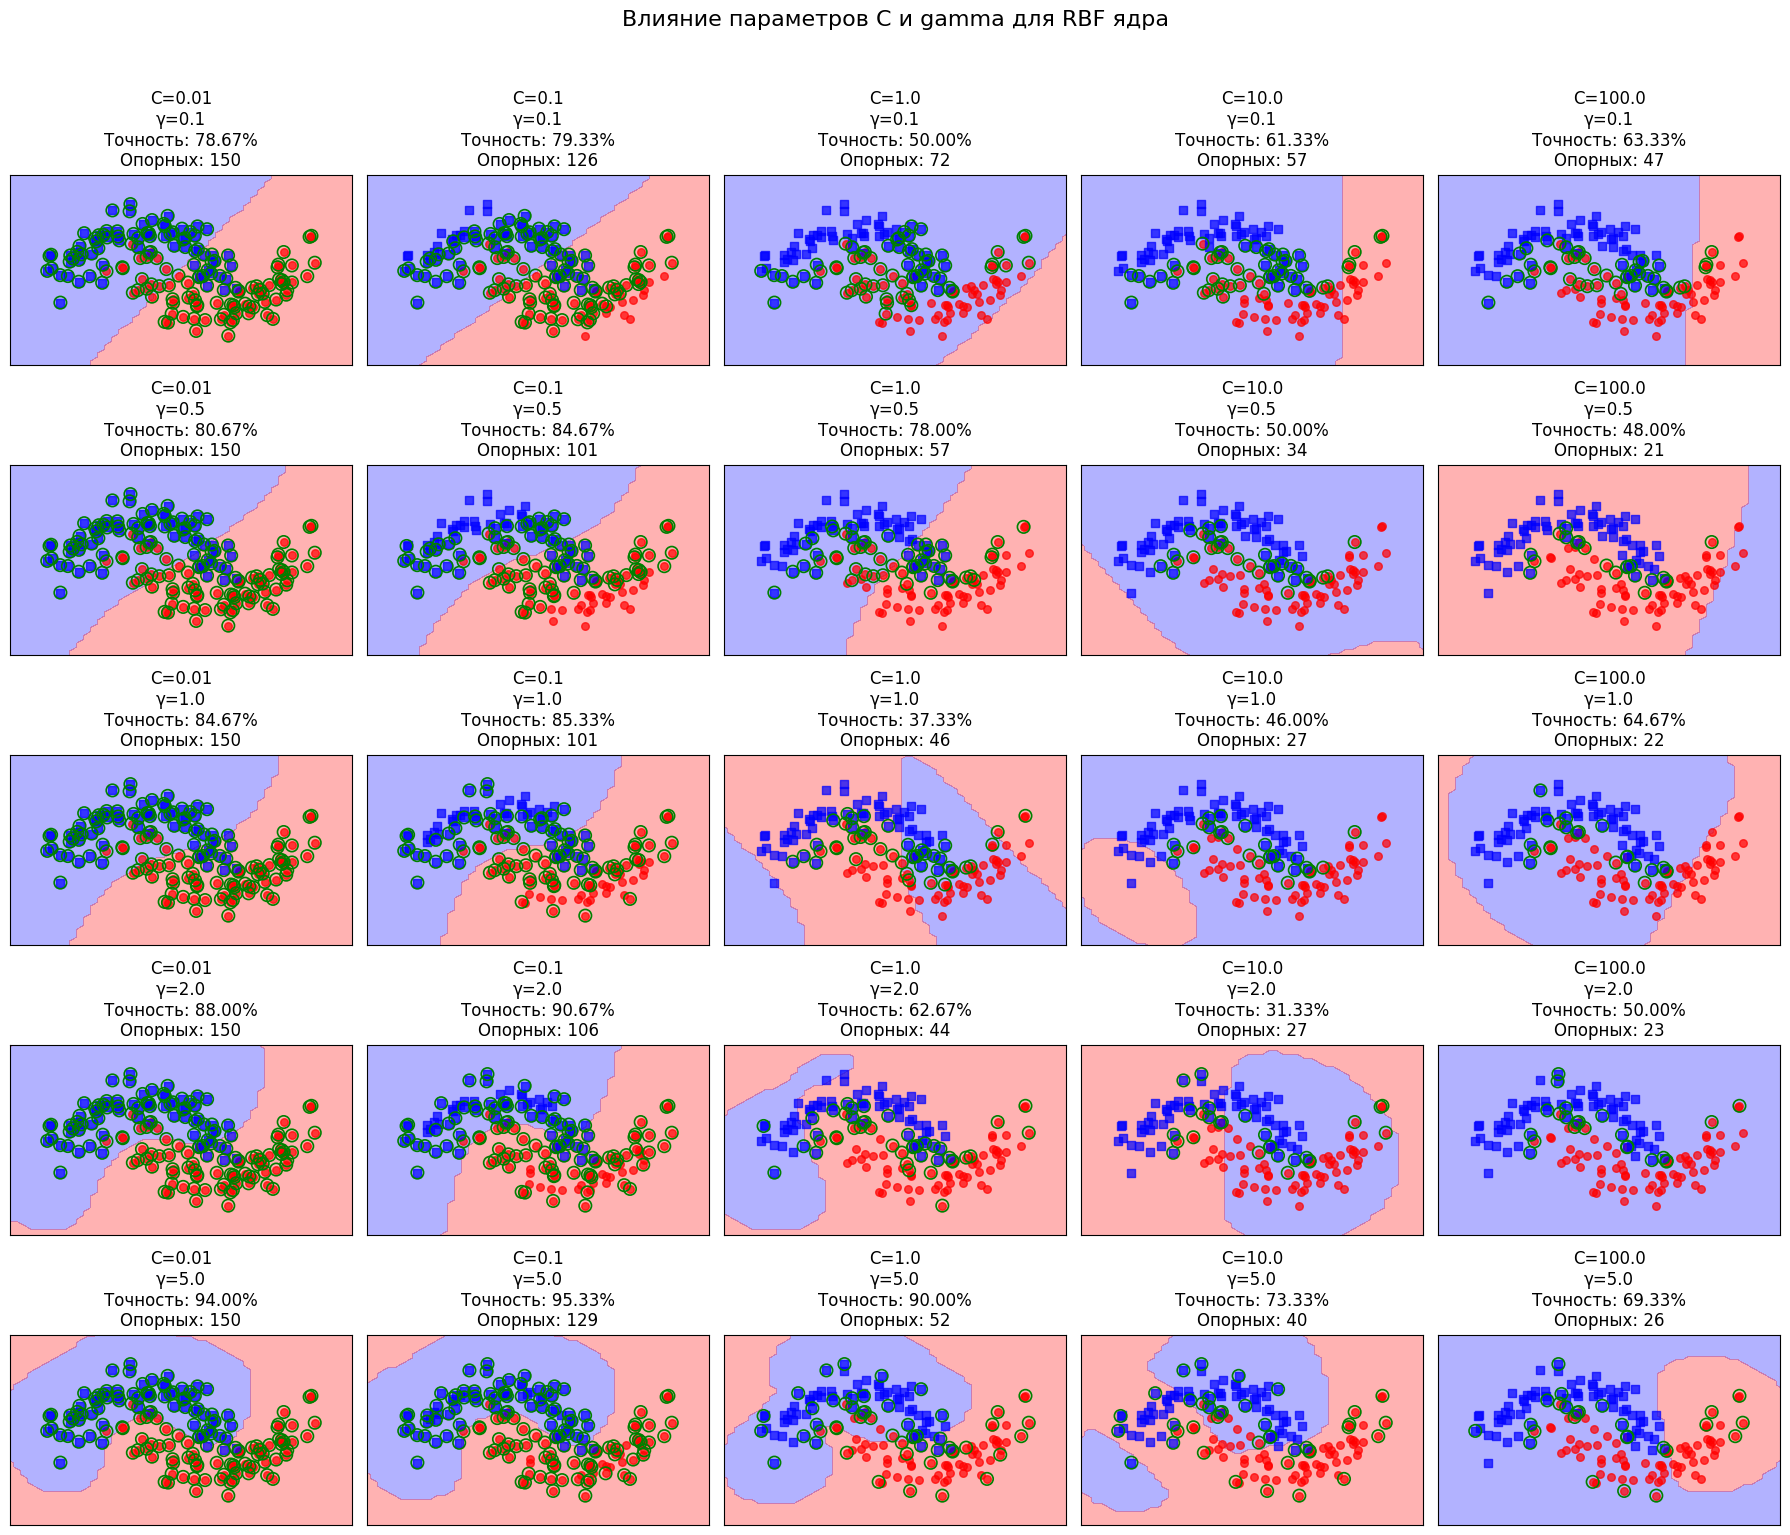

АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ RBF ЯДРА

Лучшие параметры (высокая точность):
  C=  0.10, γ= 5.00, Точность=95.33%, Опорных=129
  C=  0.01, γ= 5.00, Точность=94.00%, Опорных=150
  C=  0.10, γ= 2.00, Точность=90.67%, Опорных=106

Худшие параметры (низкая точность):
  C= 10.00, γ= 2.00, Точность=31.33%, Опорных=27
  C=  1.00, γ= 1.00, Точность=37.33%, Опорных=46
  C= 10.00, γ= 1.00, Точность=46.00%, Опорных=27

Переобучение (мало опорных векторов):
  C=100.00, γ= 0.50, Опорных=21, Точность=48.00%
  C=100.00, γ= 1.00, Опорных=22, Точность=64.67%
  C=100.00, γ= 2.00, Опорных=23, Точность=50.00%

Слишком грубая модель (много опорных векторов):
  C=  0.01, γ= 0.10, Опорных=150, Точность=78.67%
  C=  0.01, γ= 0.50, Опорных=150, Точность=80.67%
  C=  0.01, γ= 1.00, Опорных=150, Точность=84.67%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification, make_circles, make_moons
import itertools

# Отключаем вывод CVXOPT
solvers.options['show_progress'] = False

class KernelSVM:
    def __init__(self, C=1.0, kernel='linear', degree=2, gamma=1.0):
        """
        Инициализация ядрового SVM
        
        Параметры:
        C - параметр регуляризации
        kernel - тип ядра: 'linear', 'poly', 'rbf'
        degree - степень для полиномиального ядра
        gamma - параметр для RBF ядра
        """
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.alpha = None
        self.b = None
        self.X_train = None
        self.y_train = None
        self.support_vectors = None
        self.support_labels = None
        
    def kernel_func(self, x1, x2):
        """Вычисление ядерной функции"""
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'poly':
            return (np.dot(x1, x2) + 1) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.sum((x1 - x2) ** 2))
        else:
            raise ValueError(f"Неизвестное ядро: {self.kernel}")
    
    def fit(self, X, y):
        """
        Обучение ядрового SVM
        """
        n_samples = X.shape[0]
        self.X_train = X
        self.y_train = y
        
        # 1. Вычисляем матрицу ядра
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel_func(X[i], X[j])
        
        # 2. Строим матрицы для QP задачи
        P = np.outer(y, y) * K
        q = -np.ones(n_samples)
        
        # Ограничения: 0 <= alpha <= C
        G = np.vstack([-np.eye(n_samples), np.eye(n_samples)])
        h = np.hstack([np.zeros(n_samples), np.ones(n_samples) * self.C])
        
        # Ограничение: sum(alpha * y) = 0
        A = y.reshape(1, -1).astype(float)
        b = np.array([0.0])
        
        # 3. Решаем QP задачу
        P_mat = matrix(P, tc='d')
        q_mat = matrix(q, tc='d')
        G_mat = matrix(G, tc='d')
        h_mat = matrix(h, tc='d')
        A_mat = matrix(A, tc='d')
        b_mat = matrix(b, tc='d')
        
        solution = solvers.qp(P_mat, q_mat, G_mat, h_mat, A_mat, b_mat)
        self.alpha = np.array(solution['x']).flatten()
        
        # 4. Находим опорные векторы (alpha > 0)
        sv_indices = np.where(self.alpha > 1e-5)[0]
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]
        
        # 5. Вычисляем смещение b
        b_values = []
        for i in sv_indices:
            if self.alpha[i] < self.C - 1e-5:  # Для правильно классифицированных
                s = 0
                for j in sv_indices:
                    s += self.alpha[j] * y[j] * self.kernel_func(X[i], X[j])
                b_values.append(y[i] - s)
        
        if len(b_values) > 0:
            self.b = np.mean(b_values)
        else:
            # Если все опорные векторы на границе, используем все
            for i in sv_indices:
                s = 0
                for j in sv_indices:
                    s += self.alpha[j] * y[j] * self.kernel_func(X[i], X[j])
                b_values.append(y[i] - s)
            self.b = np.mean(b_values)
        
        return self
    
    def predict(self, X):
        """Предсказание для новых данных"""
        predictions = []
        for x in X:
            s = 0
            for i, sv in enumerate(self.support_vectors):
                s += self.alpha[i] * self.support_labels[i] * self.kernel_func(x, sv)
            predictions.append(s + self.b)
        return np.sign(predictions)
    
    def decision_function(self, X):
        """Значение решающей функции"""
        values = []
        for x in X:
            s = 0
            for i, sv in enumerate(self.support_vectors):
                s += self.alpha[i] * self.support_labels[i] * self.kernel_func(x, sv)
            values.append(s + self.b)
        return np.array(values)


def generate_data(n_samples=100):
    """Генерация трех типов данных"""
    # Линейно разделимые
    X1, y1 = make_classification(n_samples=n_samples, n_features=2, 
                                 n_redundant=0, n_clusters_per_class=1,
                                 random_state=1)
    y1 = 2 * y1 - 1
    
    # Два круга (нелинейные)
    X2, y2 = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, 
                          random_state=2)
    y2 = 2 * y2 - 1
    
    # Два полумесяца
    X3, y3 = make_moons(n_samples=n_samples, noise=0.1, random_state=3)
    y3 = 2 * y3 - 1
    
    return [(X1, y1, "Линейно разделимые"),
            (X2, y2, "Два круга"),
            (X3, y3, "Два полумесяца")]


def plot_svm_result(X, y, model, title):
    """
    Визуализация SVM с разделяющей поверхностью
    """
    plt.figure(figsize=(10, 8))
    
    # Создаем сетку для построения границ
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Предсказания для сетки
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображаем данные
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                marker='o', label='Класс +1', alpha=0.7)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                marker='s', label='Класс -1', alpha=0.7)
    
    # Отображаем опорные векторы
    if model.support_vectors is not None:
        plt.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                   s=200, facecolors='none', edgecolors='green',
                   linewidths=2, label='Опорные векторы')
    
    # Отображаем разделяющую поверхность и границы
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], 
                linestyles=['--', '-', '--'], linewidths=[1, 2, 1])
    
    # Заливаем области
    plt.contourf(xx, yy, np.sign(Z), alpha=0.1, 
                 colors=['blue', 'red'], levels=[-2, 0, 2])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()


def test_different_kernels():
    """Тестирование SVM с разными ядрами"""
    datasets = generate_data(n_samples=100)
    
    # Параметры для тестирования
    kernels = [
        ('linear', 'Линейное ядро', 0, 0),
        ('poly', 'Полиномиальное ядро (степень 2)', 2, 0),
        ('poly', 'Полиномиальное ядро (степень 3)', 3, 0),
        ('rbf', 'RBF ядро (gamma=1.0)', 0, 1.0),
        ('rbf', 'RBF ядро (gamma=2.0)', 0, 2.0),
    ]
    
    for X, y, data_name in datasets:
        print(f"Данные: {data_name}")
        
        for i, (kernel_type, kernel_name, degree, gamma) in enumerate(kernels):
            # Обучаем SVM
            model = KernelSVM(C=1.0, kernel=kernel_type, 
                             degree=degree, gamma=gamma)
            model.fit(X, y)
            
            # Вычисляем точность
            predictions = model.predict(X)
            accuracy = np.mean(predictions == y)
            
            print(f"\n{kernel_name}:")
            print(f"  Точность: {accuracy:.2%}")
            print(f"  Опорных векторов: {len(model.support_vectors)}")
            
            # Визуализация (не для всех, чтобы не перегружать)
            if i < 3:  # Покажем только первые 3 ядра
                plot_svm_result(X, y, model, 
                               f"{data_name}\n{kernel_name}\nТочность: {accuracy:.2%}")


def test_poly_kernel_params():
    """Исследование влияния параметров для полиномиального ядра"""
    # Генерируем сложные данные
    X, y = make_circles(n_samples=100, noise=0.1, random_state=42)
    y = 2 * y - 1
    
    # Разные значения C и степени
    C_values = [0.1, 1.0, 10.0, 100.0]
    degrees = [2, 3, 4, 5]
    
    fig, axes = plt.subplots(len(degrees), len(C_values), 
                            figsize=(15, 12))
    
    for i, degree in enumerate(degrees):
        for j, C in enumerate(C_values):
            # Обучаем SVM
            model = KernelSVM(C=C, kernel='poly', degree=degree)
            model.fit(X, y)
            
            # Создаем сетку для предсказаний
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                                np.linspace(y_min, y_max, 50))
            
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            # Визуализация
            ax = axes[i, j]
            ax.contourf(xx, yy, np.sign(Z), alpha=0.3, 
                       colors=['blue', 'red'], levels=[-2, 0, 2])
            ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                      marker='o', alpha=0.7, s=30)
            ax.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                      marker='s', alpha=0.7, s=30)
            
            if model.support_vectors is not None:
                ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                          s=100, facecolors='none', edgecolors='green',
                          linewidths=1.5)
            
            accuracy = np.mean(model.predict(X) == y)
            ax.set_title(f'C={C}, p={degree}\nТочность: {accuracy:.2%}')
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.suptitle('Влияние параметров C и степени p для полиномиального ядра', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


def test_rbf_kernel_params():
    """Исследование влияния параметров для RBF ядра"""
    # Генерируем сложные данные
    X, y = make_moons(n_samples=150, noise=0.2, random_state=42)
    y = 2 * y - 1
    
    # Разные значения C и gamma (логарифмическая сетка)
    C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
    gamma_values = [0.1, 0.5, 1.0, 2.0, 5.0]
    
    fig, axes = plt.subplots(len(gamma_values), len(C_values), 
                            figsize=(18, 15))
    
    results = []
    
    for i, gamma in enumerate(gamma_values):
        for j, C in enumerate(C_values):
            # Обучаем SVM
            model = KernelSVM(C=C, kernel='rbf', gamma=gamma)
            model.fit(X, y)
            
            # Создаем сетку для предсказаний
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                                np.linspace(y_min, y_max, 50))
            
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            # Визуализация
            ax = axes[i, j]
            ax.contourf(xx, yy, np.sign(Z), alpha=0.3, 
                       colors=['blue', 'red'], levels=[-2, 0, 2])
            ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                      marker='o', alpha=0.7, s=30)
            ax.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                      marker='s', alpha=0.7, s=30)
            
            if model.support_vectors is not None:
                ax.scatter(model.support_vectors[:, 0], model.support_vectors[:, 1],
                          s=80, facecolors='none', edgecolors='green',
                          linewidths=1.2)
            
            accuracy = np.mean(model.predict(X) == y)
            n_sv = len(model.support_vectors) if model.support_vectors is not None else 0
            
            ax.set_title(f'C={C}\nγ={gamma}\nТочность: {accuracy:.2%}\nОпорных: {n_sv}')
            ax.set_xticks([])
            ax.set_yticks([])
            
            results.append({
                'C': C,
                'gamma': gamma,
                'accuracy': accuracy,
                'n_support_vectors': n_sv
            })
    
    plt.suptitle('Влияние параметров C и gamma для RBF ядра', 
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Анализ результатов
    print("АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ RBF ЯДРА")
    
    # Находим лучшие и худшие параметры
    results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)
    
    print("\nЛучшие параметры (высокая точность):")
    for i in range(3):
        r = results_sorted[i]
        print(f"  C={r['C']:6.2f}, γ={r['gamma']:5.2f}, "
              f"Точность={r['accuracy']:.2%}, "
              f"Опорных={r['n_support_vectors']}")
    
    print("\nХудшие параметры (низкая точность):")
    for i in range(3):
        r = results_sorted[-(i+1)]
        print(f"  C={r['C']:6.2f}, γ={r['gamma']:5.2f}, "
              f"Точность={r['accuracy']:.2%}, "
              f"Опорных={r['n_support_vectors']}")
    
    print("\nПереобучение (мало опорных векторов):")
    results_sorted_sv = sorted(results, key=lambda x: x['n_support_vectors'])
    for i in range(3):
        r = results_sorted_sv[i]
        print(f"  C={r['C']:6.2f}, γ={r['gamma']:5.2f}, "
              f"Опорных={r['n_support_vectors']:2d}, "
              f"Точность={r['accuracy']:.2%}")
    
    print("\nСлишком грубая модель (много опорных векторов):")
    results_sorted_sv = sorted(results, key=lambda x: x['n_support_vectors'], reverse=True)
    for i in range(3):
        r = results_sorted_sv[i]
        print(f"  C={r['C']:6.2f}, γ={r['gamma']:5.2f}, "
              f"Опорных={r['n_support_vectors']:3d}, "
              f"Точность={r['accuracy']:.2%}")

def main():
    """Основная функция запуска всех экспериментов"""
    print("ЭКСПЕРИМЕНТЫ С ЯДРОВЫМ SVM")
    
    # 1. Тестирование разных ядер
    print("\n1. ТЕСТИРОВАНИЕ РАЗНЫХ ЯДЕРНЫХ ФУНКЦИЙ")
    test_different_kernels()
    
    # 2. Исследование полиномиального ядра
    print("\n\n2. ИССЛЕДОВАНИЕ ПОЛИНОМИАЛЬНОГО ЯДРА")
    test_poly_kernel_params()
    
    # 3. Исследование RBF ядра
    print("\n\n3. ИССЛЕДОВАНИЕ RBF ЯДРА")
    test_rbf_kernel_params()
# Запуск программы
if __name__ == "__main__":
    main()

# Примеры

Настройка вывода графиков [`Maplotlib`](http://matplotlib.org/) и импорт функций из модуля [`pylab`](http://wiki.scipy.org/PyLab).

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Визуальное решение задачи квадратичного программирования

На следующем рисунке наглядно показано решение задачи QP из задания 1. Оптимизируемая функция $f(\boldsymbol x)$ показана линиями уровня, область значений недопустимых ограничениями окрашена в серый цвет.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


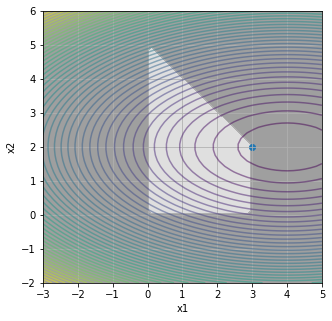

In [33]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [26]:
np.array([True, False, False]) & np.array([True, False, True])

array([ True, False, False])

In [27]:
np.logical_and(np.array([True, False, False]), np.array([True, False, True]))

array([ True, False, False])

## Установка и использование `CvxOpt`

Библиотека [`cvxopt`](http://cvxopt.org/) может быть установлена как обычный python-пакет:

In [5]:
!pip install --upgrade --user cvxopt

  Using cached https://files.pythonhosted.org/packages/16/a0/0d090735e2639a74d6628831e02cc59284e3a3a4f5910f496fc6e435b645/cvxopt-1.2.5-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/56/39/537cb3e4e93f1ac5085dc3b3a43cfd99d0af9b29c44fcaa99490f526b611/mkl-2019.0-py2.py3-none-win_amd64.whl


Нас будет интересовать функция [`cvxopt.solvers.qp()`](http://cvxopt.org/examples/tutorial/qp.html):

In [6]:
from cvxopt import solvers
?solvers.qp

## Пример работы с cvxopt

In [4]:
from cvxopt import matrix

A = matrix([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], (2,3))
print(A)
print(A.size)

[ 1.00e+00  3.00e+00  5.00e+00]
[ 2.00e+00  4.00e+00  6.00e+00]

(2, 3)


In [6]:
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],
            [0.0,-1.0,-3.0,5.0,4.0]])
print(G, G.size)

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]
 (5, 2)


In [13]:
from cvxopt import solvers

# Define QP parameters (directly)
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
# Define QP parameters (with NumPy)
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')
# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h)
# Extract optimal value and solution
print(sol['x']) # [7.13e-07, 5.00e+00]
print(sol['primal objective']) # 20.0000061731

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]

20.00000617311241


In [14]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.788553731701274e-06,
 'relative gap': 4.3942774404993765e-07,
 'primal objective': 20.00000617311241,
 'dual objective': 19.99999738455868,
 'primal infeasibility': 1.1710307819972547e-16,
 'dual infeasibility': 1.9860273225978186e-16,
 'primal slack': 7.131816408857108e-07,
 'dual slack': 1.50695110360481e-08,
 'iterations': 8}

In [19]:
print(sol['x'])

[ 7.13e-07]
[ 5.00e+00]



Матрицы задач квадратичного программирования как правило разрежены, лучше использовать матричные операции над разреженными матрицами при реализации SVM.
[Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

## Генерация случайной выборки для задачи классификации

В `SciKit-Learn` есть функция генерации случайных выборок для классификации [`sklearn.datasets.make_classification()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Для того чтобы выборки не менялись при перезапуске ноутбука, используйте параметр `random_state`.

In [7]:
from sklearn.datasets import make_classification

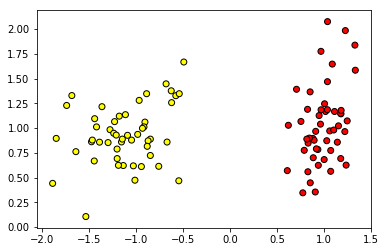

In [10]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

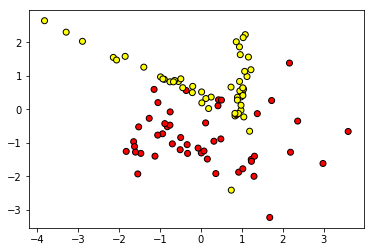

In [11]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=2)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

## Визуализация решающего правила

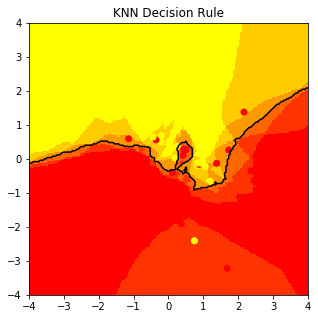

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

figure(figsize=(5, 5))
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

xvals = linspace(-4, 4, 200)
yvals = linspace(-4, 4, 200)

xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1], xx.shape)

# Цветной фон, соответствующий значению решающего правила
pcolormesh(xx, yy, zz, cmap='autumn', zorder=0)

# Линия уровня, соответствующая значению 0.5
contour(xx, yy, zz, levels=(0.5,), colors='k', linewidths=1.5, zorder=1)

xlim([-4, 4])
ylim([-4, 4])
_ = title('KNN Decision Rule')

## Реализация собственной модели для SciKit-Learn

В заданиях 2 и 3 требуется самостоятельно реализовать алгоритм обучения классификатора. Для того чтобы ваш алгоритм можно было использовать различными компонентами библиотеки SciKit-Learn (оценка качества, подбор параметров, композиции и т.д.) нужно всего лишь [реализовать интерфейс `BaseEstimator`](http://scikit-learn.org/stable/developers/#estimators).

In [13]:
from sklearn.base import BaseEstimator

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        self.weights_ = empty(dim)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        return (dot(X, self.weights_) + self.bias_).flatten()
            
    def predict(self, X):
        return sign(self.predict_proba(X))

In [ ]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    def __init__(self, C, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        self.dim = X.shape[1]
        self.N = X.shape[0]
        self.alpha_ = empty(self.N)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        pass
            
    def predict(self, X):
        pass